In [1]:
# Importing require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Define range date and stock symbol
stock_Symbol = 'AMZN'
start_Date = '2021-01-01'
end_Date = '2024-01-01'

# Fetch the data
stock_Data = yf.download(stock_Symbol, start = start_Date, end = end_Date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
stock_Data.head()
stock_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-01-04 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       753 non-null    float64
 1   High       753 non-null    float64
 2   Low        753 non-null    float64
 3   Close      753 non-null    float64
 4   Adj Close  753 non-null    float64
 5   Volume     753 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


In [5]:
stock_Data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
stock_Data = stock_Data.dropna()

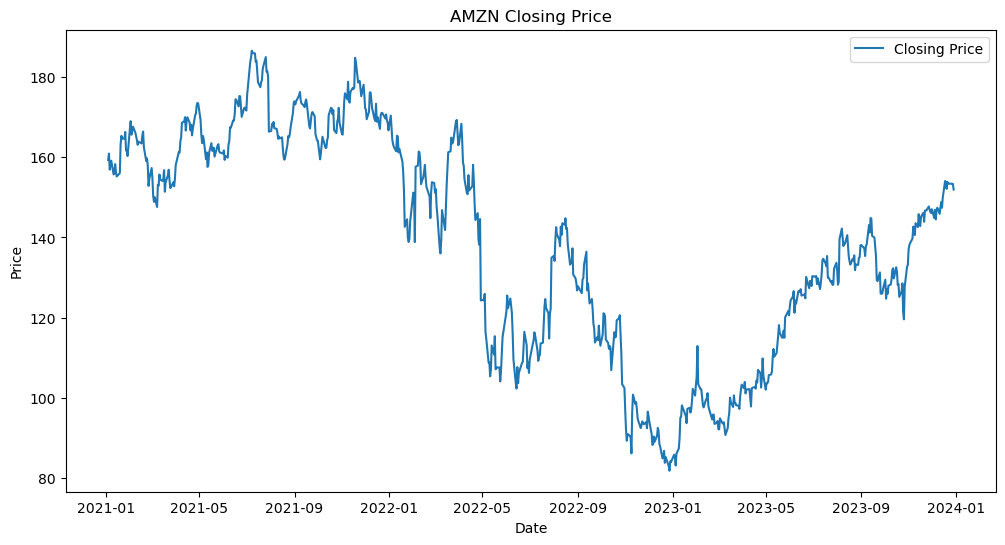

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(stock_Data['Close'], label='Closing Price')
plt.title(f'{stock_Symbol} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

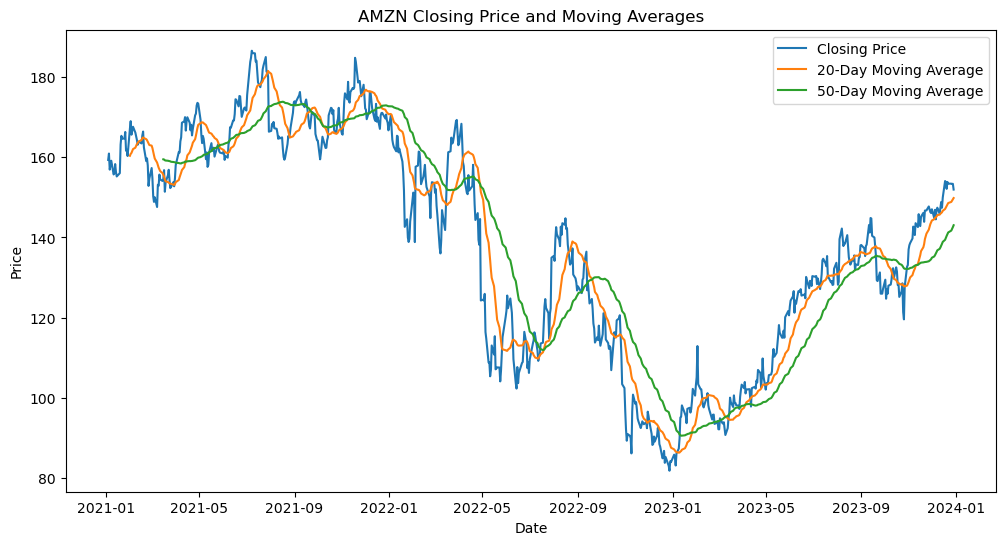

In [11]:
stock_Data['MA20'] = stock_Data['Close'].rolling(window=20).mean()
stock_Data['MA50'] = stock_Data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_Data['Close'], label='Closing Price')
plt.plot(stock_Data['MA20'], label='20-Day Moving Average')
plt.plot(stock_Data['MA50'], label='50-Day Moving Average')
plt.title(f'{stock_Symbol} Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

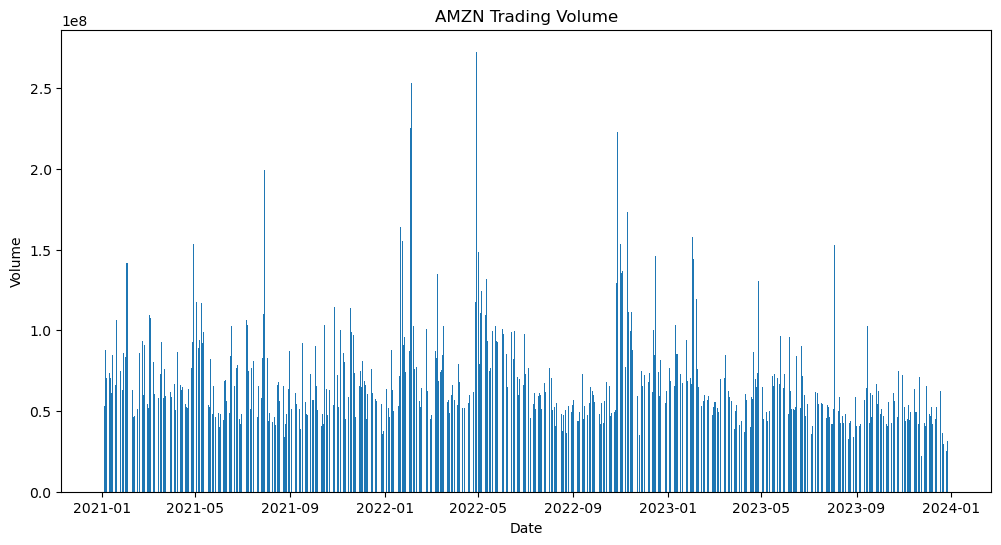

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(stock_Data.index, stock_Data['Volume'])
plt.title(f'{stock_Symbol} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

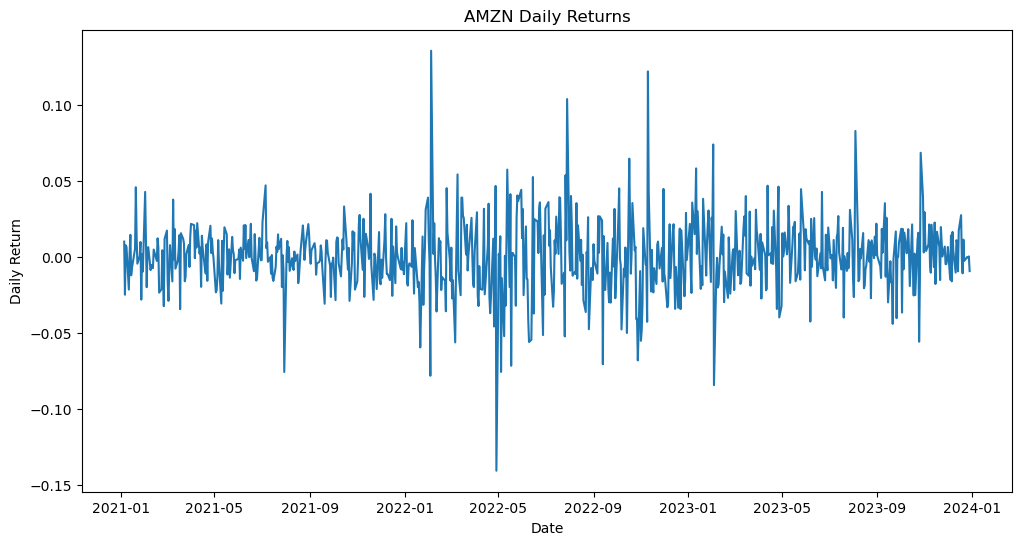

In [13]:
stock_Data['Daily Return'] = stock_Data['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(stock_Data['Daily Return'])
plt.title(f'{stock_Symbol} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [14]:
daily_returns = stock_Data['Daily Return'].dropna()
daily_returns.describe()

count    752.000000
mean       0.000214
std        0.023557
min       -0.140494
25%       -0.012770
50%        0.000284
75%        0.012747
max        0.135359
Name: Daily Return, dtype: float64

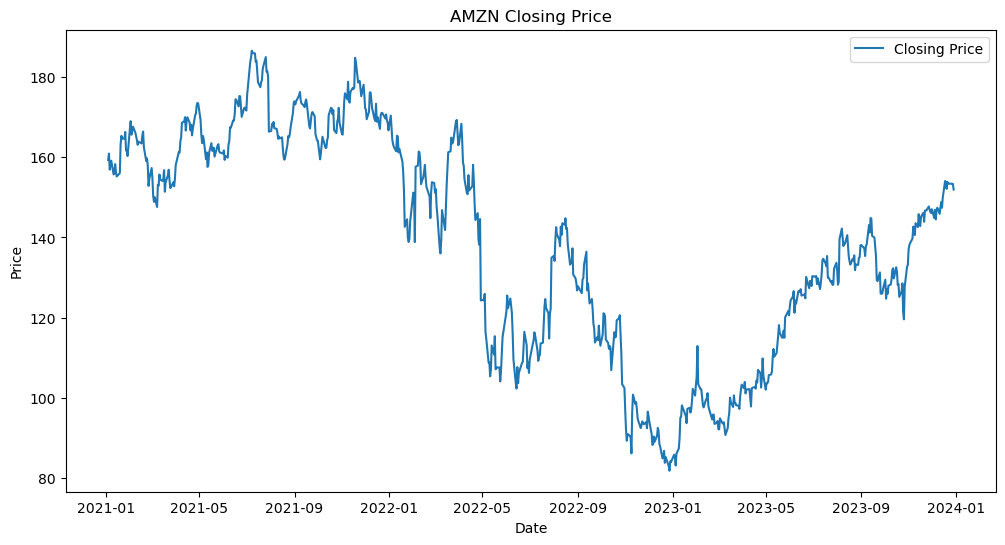

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(stock_Data['Close'], label='Closing Price')
plt.title(f'{stock_Symbol} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('closing_price.png')

In [19]:
stock_Data.to_csv('stock_data.csv')